In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os

In [45]:
IMG_SIZE = (224, 224)

EX_TEST_DIR = Path(os.getcwd()).parent / "ex-data"
print("External test directory exists:", EX_TEST_DIR)

External test directory exists: c:\Users\user\1- Notebook\image\egyptian-new-currency-classifier\ex-data


In [46]:
model = tf.keras.models.load_model("../checkpoints/EfficientNetB0/effnet_b0_transfer_final-only-fe.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction probabilities for 12912727-600x450.jpeg: [[0.0281271  0.10373079 0.10887184 0.02995333 0.49245363 0.12243527
  0.02298361 0.03948906 0.05195537]]


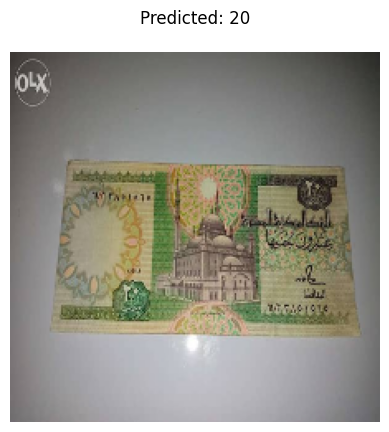

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Prediction probabilities for 202406041633317295.jpg: [[0.27762938 0.04096461 0.0277557  0.0654978  0.25137666 0.02177091
  0.04922173 0.10815789 0.1576253 ]]


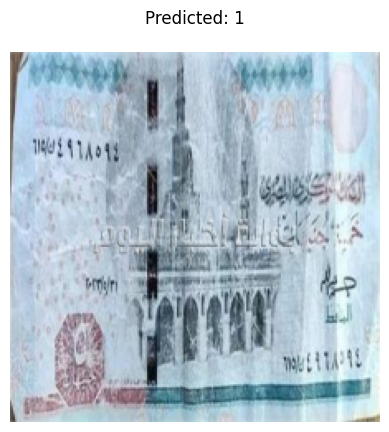

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediction probabilities for download.jpg: [[0.00770661 0.00179547 0.9508374  0.0165896  0.00480151 0.00153013
  0.00620852 0.00525992 0.00527086]]


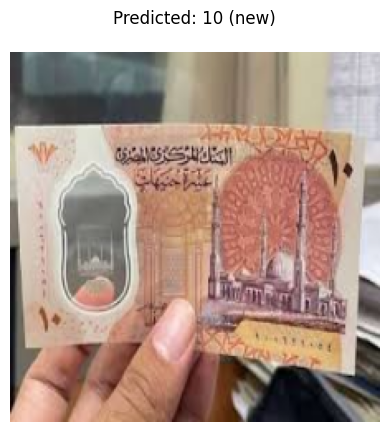

In [ ]:
class_names = ['1', '10', '10 (new)', '100', '20', '20 (new)', '200', '5', '50']
preproc = tf.keras.applications.efficientnet.preprocess_input

if not EX_TEST_DIR.exists():
    print(f"Error: Directory does not exist: {EX_TEST_DIR}")
    print("Please create the directory or check the path")
else:
    for image in os.listdir(EX_TEST_DIR):
        image_path = os.path.join(EX_TEST_DIR, image)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_resized = cv2.resize(img, IMG_SIZE)

        img_array = np.expand_dims(img_resized, axis=0)
        img_array = preproc(img_array)
        pred = model.predict(img_array)
        print(f"Prediction probabilities for {image}: {pred}")
        pred_class = class_names[np.argmax(pred)]

        plt.imshow(img_resized)
        plt.title(f"Predicted: {pred_class}\n")
        plt.axis('off')
        plt.show()